# Analyzing out-of-this world data
Using data collected from the Open Exoplanet Catalogue database: https://github.com/OpenExoplanetCatalogue/open_exoplanet_catalogue/

## Data License
Copyright (C) 2012 Hanno Rein

Permission is hereby granted, free of charge, to any person obtaining a copy of this database and associated scripts (the "Database"), to deal in the Database without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Database, and to permit persons to whom the Database is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Database. A reference to the Database shall be included in all scientific publications that make use of the Database.

THE DATABASE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE DATABASE OR THE USE OR OTHER DEALINGS IN THE DATABASE.

## Setup

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## EDA

In [2]:
planets = pd.read_csv('data/planets.csv')

In [3]:
planets.head()

,period,name,eccentricity,description,discoverymethod,periastrontime,lastupdate,semimajoraxis,mass,periastron,list,discoveryyear
0,326.03,11 Com b,0.231,11 Com b is a brown dwarf-mass companion to th...,RV,2452899.60,15/09/20,1.290,19.400,94.800,Confirmed planets,2008.0
1,516.22,11 UMi b,0.080,11 Ursae Minoris is a star located in the cons...,RV,2452861.04,15/09/20,1.540,11.200,117.630,Confirmed planets,2009.0
2,185.84,14 And b,0.000,14 Andromedae is an evolved star in the conste...,RV,2452861.40,15/09/20,0.830,4.800,0.000,Confirmed planets,2008.0
3,1766.00,14 Her b,0.359,The star 14 Herculis is only 59 light years aw...,RV,NaN,15/09/21,2.864,4.975,22.230,Confirmed planets,2002.0
4,9886.00,14 Her c,0.184,14 Her c is the second companion in the system...,RV,NaN,15/09/21,9.037,7.679,189.076,Controversial,2006.0


### Looking for correlated features
It's important to perform an in-depth exploration of the data before modeling. This includes consulting domain experts, looking for correlations between variables, examining distributions, etc. The visualizations covered in chapters [5](https://github.com/stefmolin/Hands-On-Data-Analysis-with-Pandas/tree/master/ch_05) and [6](https://github.com/stefmolin/Hands-On-Data-Analysis-with-Pandas/tree/master/ch_06) will prove indispensible for this process. One such visualization is the heatmap which we can use to look for correlated features:

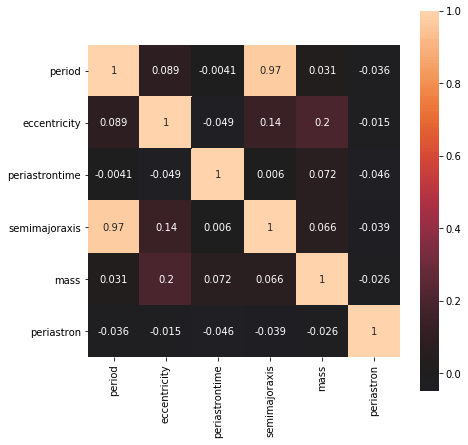

In [4]:
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
    planets.drop(columns='discoveryyear').corr(), 
    center=0, square=True, annot=True
)

### Looking at Orbit shape
(0, 1) is elliptical, 0 is perfect circle

Text(0.5, 1.0, 'Exoplanet Eccentricities')

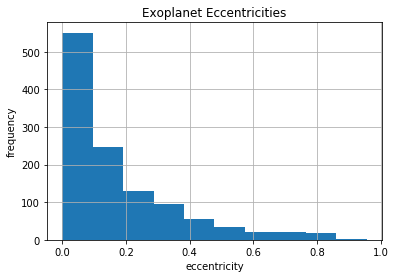

In [5]:
planets.eccentricity.hist()
plt.xlabel('eccentricity')
plt.ylabel('frequency')
plt.title('Exoplanet Eccentricities')

In [6]:
planets.eccentricity.min(), planets.eccentricity.max()

(0.0, 0.956)

### Understanding the semi-major axis
An ellipse, being an elongated circle has 2 axes: **major** and **minor** for the longest and smallest ones, respectively. The *semi*-major axis is half the major axis. When compared to a circle, the axes are like the diameter crossing the entire shape and the semis are akin to the radius being half the diameter.

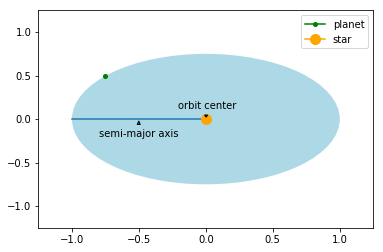

In [7]:
from matplotlib.patches import Ellipse

fig, axes = plt.subplots(1, 1)
orbit = Ellipse(xy=(0, 0), width=2, height=1.5, facecolor='lightblue')
axes.add_artist(orbit)
axes.plot([-1, 0], [0, 0])
axes.annotate(
    'semi-major axis', 
    xy=(-0.5, 0), 
    xytext=(-0.8, -0.2), 
    arrowprops=dict(arrowstyle='wedge')
)
axes.annotate(
    'orbit center', 
    xy=(0, 0), 
    xytext=(-0.21, 0.115), 
    arrowprops=dict(arrowstyle='wedge')
)
plt.plot(
    [-.75], [0.5], 
    marker='o', markersize=4, 
    color='green', label='planet'
)
plt.plot(
    [0], [0], 
    marker='o', markersize=10, 
    color='orange', label='star'
)
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25, 1.25)
plt.legend()

### Checking data values
With just the variables of interest, we have a lot of missing data:

In [8]:
planets[['period', 'eccentricity', 'semimajoraxis', 'mass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3814 entries, 0 to 3813
Data columns (total 4 columns):
period           3684 non-null float64
eccentricity     1172 non-null float64
semimajoraxis    1456 non-null float64
mass             1417 non-null float64
dtypes: float64(4)
memory usage: 119.2 KB


If we drop it, we are left with about a third of it:

In [9]:
planets[['period', 'eccentricity', 'semimajoraxis', 'mass']].dropna().shape

(1044, 4)

We use `describe()` to get a summary of the variables of interest:

In [10]:
planets[['period', 'eccentricity', 'semimajoraxis', 'mass']].describe()

,period,eccentricity,semimajoraxis,mass
count,3684.000000,1172.000000,1456.000000,1417.000000
mean,517.715911,0.168518,1.610329,2.837145
std,7284.863699,0.190131,8.282760,9.043661
min,0.090706,0.000000,0.004420,0.000008
25%,4.725905,0.020000,0.052530,0.141600
50%,12.878744,0.109000,0.163518,0.914000
75%,48.350875,0.250000,1.250000,2.540000
max,320000.000000,0.956000,177.000000,263.000000


### Visualizing Year and Orbit Length
We have information on the planet list each planet belongs to. We may be wondering if these planets controversial because they are so far away?

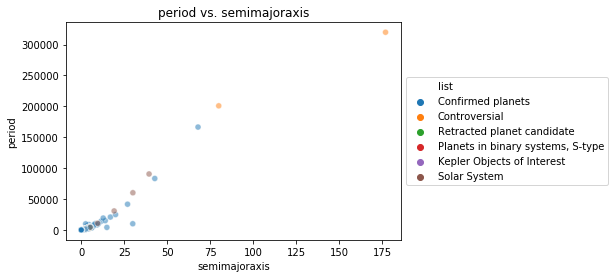

In [11]:
ax = sns.scatterplot(planets.semimajoraxis, planets.period, hue=planets.list, alpha=0.5)
plt.title('period vs. semimajoraxis')
ax.legend(bbox_to_anchor=(1, 0.77)) # move legend to the right of the plot

Since semi-major axis is highly correlated with period, let's see how the planets compare and label those in our solar system:

Text(0.5, 1.0, 'log(orbital period) vs. semi-major axis')

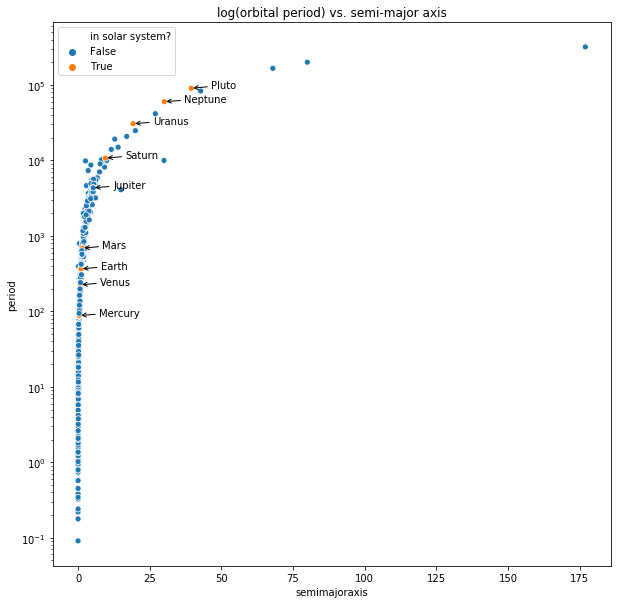

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
in_solar_system = (planets.list == 'Solar System').rename('in solar system?')
ax = sns.scatterplot(
    planets.semimajoraxis, 
    planets.period, 
    hue=in_solar_system,
    ax=axes
)
ax.set_yscale('log')
solar_system = planets[planets.list == 'Solar System']
for planet in solar_system.name:
    data = solar_system.query(f'name == "{planet}"')
    ax.annotate(
        planet, 
        (data.semimajoraxis, data.period), 
        (7 + data.semimajoraxis, data.period),
        arrowprops=dict(arrowstyle='->')
    )
ax.set_title('log(orbital period) vs. semi-major axis')

## Finding Similar Planets with k-Means Clustering
Since we want to perform clustering to learn more about the data, we will build our pipeline standardizing the data before running k-means and fit it on the all the data:

In [13]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

kmeans_pipeline = Pipeline(
    [
        ('scale', StandardScaler()), 
        ('kmeans', KMeans(8, random_state=0))
    ]
)

Grab the data and fit the model:

In [14]:
kmeans_data = planets[['semimajoraxis', 'period']].dropna()
kmeans_pipeline.fit(kmeans_data)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0))])

We can recreate our plot from before and this time, color by the cluster k-means put each planet in:

Text(0.5, 1.0, 'KMeans Clusters')

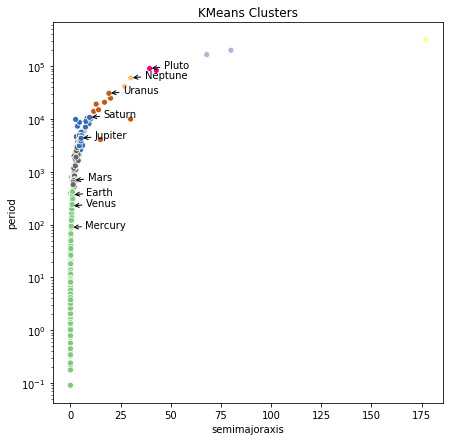

In [15]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
ax = sns.scatterplot(
    kmeans_data.semimajoraxis, 
    kmeans_data.period, 
    hue=kmeans_pipeline.predict(kmeans_data),
    ax=axes, palette='Accent'
)
ax.set_yscale('log')
solar_system = planets[planets.list == 'Solar System']
for planet in solar_system.name:
    data = solar_system.query(f'name == "{planet}"')
    ax.annotate(
        planet, 
        (data.semimajoraxis, data.period), 
        (7 + data.semimajoraxis, data.period),
        arrowprops=dict(arrowstyle='->')
    )
ax.get_legend().remove()
ax.set_title('KMeans Clusters')

The elbow point method can be used to pick a good value for `k`. This value will be were we begin to see diminishing returns in the reduction of the value of the objective function:

Text(4.5, 1450, '')

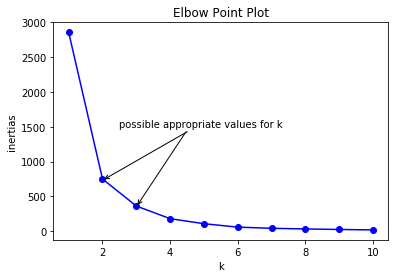

In [16]:
from ml_utils.elbow_point import elbow_point

ax = elbow_point(
    kmeans_data, 
    Pipeline([
        ('scale', StandardScaler()), 
        ('kmeans', KMeans(random_state=0))
    ])
)
ax.annotate(
    'possible appropriate values for k', xy=(2, 730), xytext=(2.5, 1500), 
    arrowprops=dict(arrowstyle='->')
)
ax.annotate(
    '', xy=(3, 350), xytext=(4.5, 1450), arrowprops=dict(arrowstyle='->')
)

k-means with the "optimal" k of 2

Text(0.5, 1.0, 'KMeans Clusters')

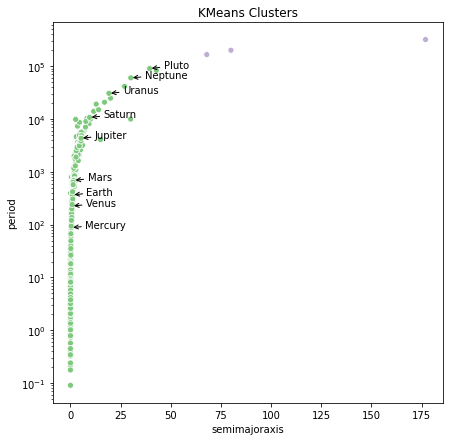

In [17]:
kmeans_pipeline_2 = Pipeline(
    [
        ('scale', StandardScaler()), 
        ('kmeans', KMeans(2, random_state=0))
    ]
).fit(kmeans_data)
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
ax = sns.scatterplot(
    kmeans_data.semimajoraxis, 
    kmeans_data.period, 
    hue=kmeans_pipeline_2.predict(kmeans_data),
    ax=axes, palette='Accent'
)
ax.set_yscale('log')
solar_system = planets[planets.list == 'Solar System']
for planet in solar_system.name:
    data = solar_system.query(f'name == "{planet}"')
    ax.annotate(
        planet, 
        (data.semimajoraxis, data.period), 
        (7 + data.semimajoraxis, data.period),
        arrowprops=dict(arrowstyle='->')
    )
ax.get_legend().remove()
ax.set_title('KMeans Clusters')

### Visualizing the cluster space
Since we standardized the data, looking at the centers tells us the second cluster contains "outliers" for period and semi-major axis:

In [18]:
kmeans_pipeline_2.named_steps['kmeans'].cluster_centers_

array([[-0.03757155, -0.04116566],
       [17.84648778, 19.55368709]])

We can also visualize the clusters:

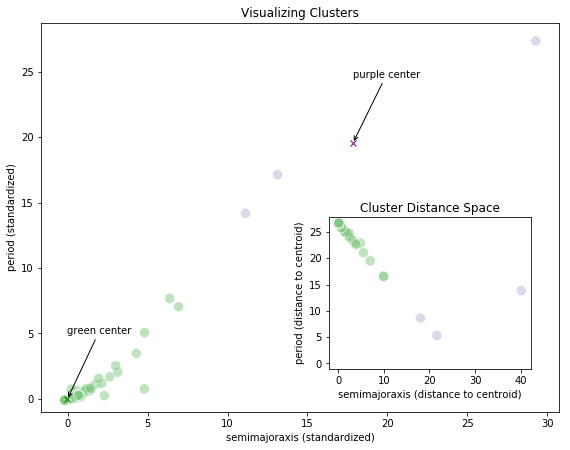

In [19]:
# set up layout
fig = plt.figure(figsize=(8, 6))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.6, 0.2, 0.35, 0.35])

# scaled data and cluster distance data
scaled = kmeans_pipeline_2.named_steps['scale'].fit_transform(
    kmeans_data
)
cluster_distances = kmeans_pipeline_2.fit_transform(
    kmeans_data
)

for ax, data, title, axes_labels in zip(
    [outside, inside], [scaled, cluster_distances],  
    ['Visualizing Clusters', 'Cluster Distance Space'], 
    ['standardized', 'distance to centroid']
):
    ax = sns.scatterplot(
        data[:,0], data[:,1], ax=ax, palette='Accent', alpha=0.5,
        hue=kmeans_pipeline_2.named_steps['kmeans'].labels_, s=100
    )

    ax.get_legend().remove()
    ax.set_title(title)
    ax.set_xlabel(f'semimajoraxis ({axes_labels})')
    ax.set_ylabel(f'period ({axes_labels})')
    ax.set_ylim(-1, None)
    
# add the centroids to the outside plot
cluster_centers = kmeans_pipeline_2.named_steps['kmeans']\
                    .cluster_centers_
for color, centroid in zip(['green', 'purple'], cluster_centers):
    outside.plot(*centroid, color=color, marker='x')
    outside.annotate(
        f'{color} center', xy=centroid, xytext=centroid + [0, 5], 
        arrowprops=dict(arrowstyle='->')
    )

#### Evaluation of model
There are many metrics to choose from, but since we don't know the true labels of our data, we can only use unsupervised ones. We will use a few different metrics to get a more well-rounded view of our performance:

##### Silhouette Score
- true labels not known
- higher = better defined (more separated) clusters
- -1 is worst, 1 is best, near 0 indicates overlapping clusters

In [20]:
from sklearn.metrics import silhouette_score
silhouette_score(kmeans_data, kmeans_pipeline.predict(kmeans_data)) 

0.756431346264896

##### Davies-Bouldin Score
- true labels not known
- ratio of within-cluster distances to between-cluster distances
- zero is best parition 

In [21]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(kmeans_data, kmeans_pipeline.predict(kmeans_data)) 

c:\users\molinstefanie\packt\venv\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
c:\users\molinstefanie\packt\venv\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


0.4432430729371101

##### Calinski and Harabaz Score
- true labels not known
- higher = better defined (more separated) clusters

In [22]:
from sklearn.metrics import calinski_harabaz_score
calinski_harabaz_score(kmeans_data, kmeans_pipeline.predict(kmeans_data)) 

23153.731441632073

## Predicting Length of Year in Earth Days (Period)
1. separate x and y data, dropping nulls
2. create the training and testing sets
3. train a linear regression model (no pipeline since we want to interpret the coefficients)
4. isolate the coefficients from the model
5. evaluate the model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1
data = planets[
    ['semimajoraxis', 'period', 'mass', 'eccentricity']
].dropna()
X = data[['semimajoraxis', 'mass', 'eccentricity']]
y = data.period

# 2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

### Linear Regression

In [24]:
# 3
lm = LinearRegression().fit(X_train, y_train)

### Get equation

In [25]:
# get intercept
lm.intercept_

-1016.9414328876608

In [26]:
# 4. get coefficients
[(col, coef) for col, coef in zip(X_train.columns, lm.coef_)]

[('semimajoraxis', 2089.7990582230304),
 ('mass', -11.450731945992032),
 ('eccentricity', -4000.9101385815848)]

### Evaluation of model

In [27]:
# 5
preds = lm.predict(X_test)
np.corrcoef(y_test, preds)[0][1]

0.9766538595075525

Text(0.5, 0.98, 'Linear Regression')

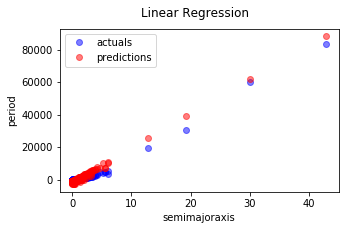

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
axes.plot(X_test.semimajoraxis, y_test, 'bo', label='actuals', alpha=0.5)
axes.plot(X_test.semimajoraxis, preds, 'ro', label='predictions', alpha=0.5)
plt.xlabel('semimajoraxis')
plt.ylabel('period')
plt.legend()
plt.suptitle('Linear Regression')

#### Residuals

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13647FB0>,
      dtype=object)

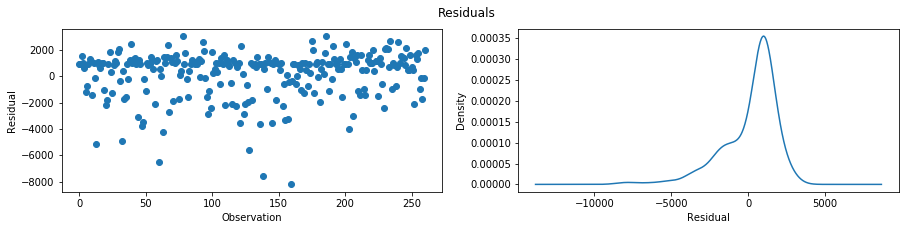

In [29]:
from ml_utils.regression import plot_residuals

plot_residuals(y_test, preds)

#### R-squared

In [30]:
lm.score(X_test, y_test)

0.9297571053513579

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.9297571053513579

#### Adjusted R-squared
R-squared increases when we add regressors whether or not they actually improve the model. Adjusted R-squared penalizes additional regressors to address this:

In [32]:
from ml_utils.regression import adjusted_r2
adjusted_r2(lm, X_test, y_test)

0.9289371493826968

#### Problems with R-squared
R-squared doesn't tell us about the prediction errors or if we specified the model correctly. Consider Anscombe's quartet from [chapter 1](https://github.com/stefmolin/Hands-On-Data-Analysis-with-Pandas/blob/master/ch_01/introduction_to_data_analysis.ipynb):

##### Anscombe's Quartet
All four data sets have the same summary statistics (mean, standard deviation, correlation coefficient), despite having different data:

In [33]:
anscombe = sns.load_dataset('anscombe').groupby('dataset')
anscombe.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

When fitted with a regression line, they all have the same R-squared despite some of them not indicating a linear relationship between x and y:

Text(0.5, 0.95, "Anscombe's Quartet")

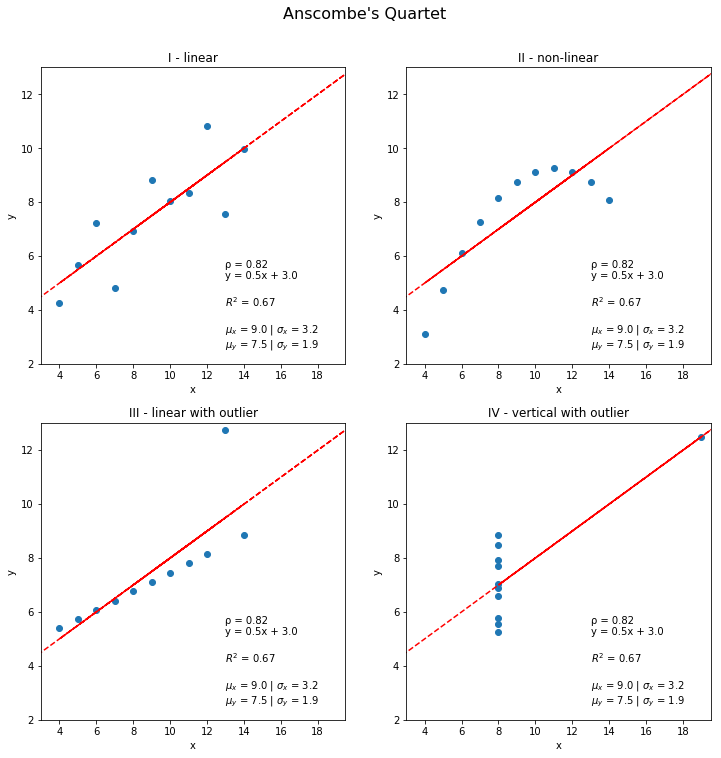

In [34]:
from sklearn.metrics import r2_score

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
titles = ['linear', 'non-linear', 'linear with outlier', 'vertical with outlier']

for ax, (group_name, group_data), title in zip(axes, anscombe, titles):
    x, y = group_data.x, group_data.y
    ax.scatter(x, y)
    ax.set_title(f'{group_name} - {title}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim((3, 19.5))
    ax.set_ylim((2, 13))
    
    # get regression line
    m, b = np.polyfit(x, y, 1)
    reg_x = np.append([0, 20], x)
    reg_y = [m*num + b for num in reg_x]
    ax.plot(reg_x, reg_y, 'r--')
    ax.annotate(
        f"""ρ = {np.corrcoef(x,y)[0][1]:.2}\ny = {m:.2}x + {b:.2}\n\n{
            r'$R^2$'
        } = {r2_score(y, [m*num + b for num in x]):.2}\n\n{
            r'$μ_x$'
        } = {np.mean(x):2} | {
            r'$σ_x$'
        } = {np.std(x):.2}\n{
            r'$μ_y$'
        } = {np.mean(y):.2} | {r'$σ_y$'} = {np.std(y):.2}""", xy=(13, 2.5)
    )
plt.suptitle("Anscombe's Quartet", fontsize=16, y=0.95)

#### Explained Variance

In [35]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, preds)

0.9304626837290991

#### Mean Absolute Error (MAE)

In [36]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, preds)

1396.404208388504

#### Root Mean Squared Error (RMSE)

In [37]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, preds))

1777.2717945732813

#### Median Absolute Error

In [38]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, preds)

1080.3627726120715